In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day48-simple-linear-regression/placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

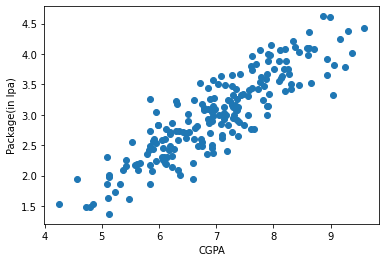

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred=lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
y_pred

array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

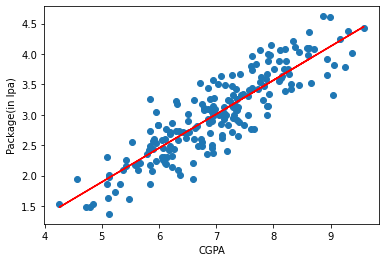

In [13]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train.squeeze(),lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [14]:
m = lr.coef_
c = lr.intercept_
# y = mx + c

print(m * 8.58 + c)
print(m * 9.5 + c)
print(m * 100 + c)

[3.89111601]
[4.40443183]
[54.89908542]


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
y_pred = lr.predict(X_test)

In [20]:
print("MAE is",mean_absolute_error(y_test,y_pred))
print("MSE is",mean_squared_error(y_test,y_pred))
print("RMSE is",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE is 0.2884710931878175
MSE is 0.12129235313495527
MSE is 0.34827051717731616


In [23]:
print("R2 is",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2 is 0.780730147510384


In [24]:
# Adjusted r2
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [25]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.549283,3.26
1,5.12,0.281475,1.98
2,7.82,0.711092,3.25
3,7.42,0.075737,3.67
4,6.94,0.945587,3.57


Text(0, 0.5, 'Package(in lpa)')

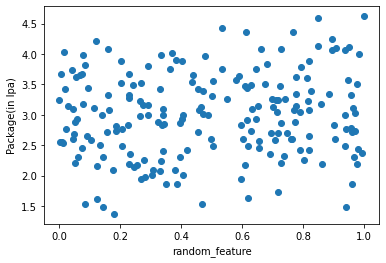

In [26]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [27]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)

In [31]:
print("R2 score",r2_score(y_test,y_pred))

R2 score 0.7629159233026026


In [32]:
r2 = r2_score(y_test,y_pred)

In [33]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.750100567805446

In [34]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [35]:
new_df2.sample(5)

,cgpa,iq,package
109,7.77,3.66,4.06
44,5.09,0.96,1.86
102,5.13,0.17,1.37
39,7.43,3.93,3.33
105,6.66,2.52,2.82


Text(0, 0.5, 'Package(in lpa)')

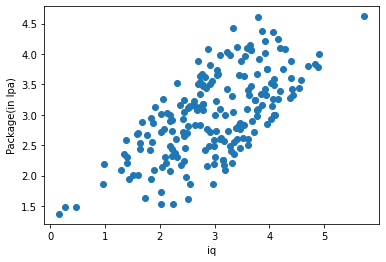

In [36]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [37]:
np.random.randint(-100,100)

-91

In [38]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [41]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)


R2 score 0.825746495165822


In [42]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8163273867964069

In [25]:
# Manually calculating

In [26]:
class ManuallLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        print(X_test)
        
        return self.m * X_test + self.b

In [27]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [28]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
X_train.shape

(160,)

In [32]:
lr = ManuallLR()

In [33]:
lr.fit(X_train,y_train)

0.5579519734250721
-0.8961119222429152


In [34]:
X_train.shape[0]

160

In [35]:
X_train[0]

7.14

In [36]:
X_train.mean()

6.989937500000001

In [37]:
X_test[0]

8.58

In [38]:
print(lr.predict(X_test[0]))

8.58
3.891116009744203
